# 인공지능기초 2주차 실습(결과)

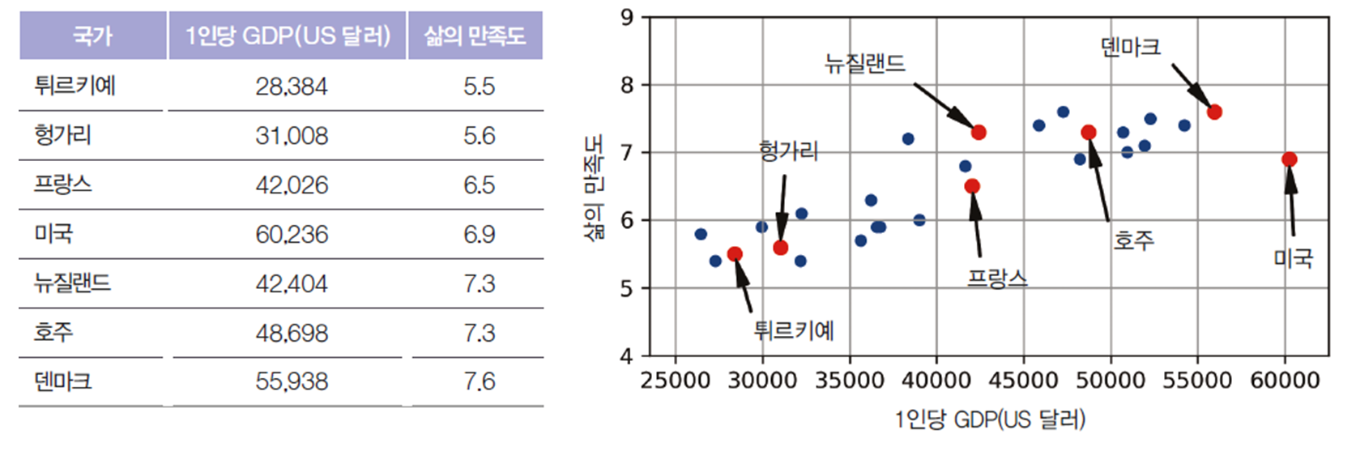

[국가별 1인당 GDP](https://www.imf.org/external/datamapper/NGDPDPC@WEO/OEMDC/ADVEC/WEOWORLD)와 [더 나은 삶의 지표(Better Life Index)](https://data-explorer.oecd.org/vis?tenant=archive&df[ds]=DisseminateArchiveDMZ&df[id]=DF_BLI&df[ag]=OECD&dq=...&to[TIME]=false)에서 추출한 삶의 만족도 간의 관계를 **머신러닝 모델**을 통해 분석한다.<br>
이로부터 "돈이 사람을 행복하게 만든다"라는 가설을 검증해본다.

## 단계 1. 데이터 준비

데이터는 [Life satisfaction and GDP per capita](https://github.com/ageron/data/tree/main/lifesat)에서 구할 수 있다.

우선, 필요한 라이브러리를 불러온다

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

데이터를 불러오고, 제대로 불러온지 확인한다.

In [ ]:
data_path = "https://raw.githubusercontent.com/ageron/data/refs/heads/main/lifesat/lifesat.csv"

In [ ]:
data = pd.read_csv(data_path)
data.head()

,Country,GDP per capita (USD),Life satisfaction
0,Russia,26456.387938,5.8
1,Greece,27287.083401,5.4
2,Turkey,28384.987785,5.5
3,Latvia,29932.493910,5.9
4,Hungary,31007.768407,5.6


우리는 불러온 데이터에서 <code>GDP per capita (USD)</code>를 예측변수(속성, feature)로 설정하고, <code>Life satisfaction</code>를 타겟(target)변수로 설정한다.

In [ ]:
X = data[["GDP per capita (USD)"]].values
Y = data[["Life satisfaction"]].values

In [ ]:
Y

array([[5.8],
       [5.4],
       [5.5],
       [5.9],
       [5.6],
       [5.4],
       [6.1],
       [5.7],
       [6.3],
       [5.9],
       [5.9],
       [7.2],
       [6. ],
       [6.8],
       [6.5],
       [7.3],
       [7.4],
       [7.6],
       [6.9],
       [7.3],
       [7.3],
       [7. ],
       [7.1],
       [7.5],
       [7.4],
       [7.6],
       [6.9]])

설정한 두 변수를 그래프로 나타내어 확인해본다.

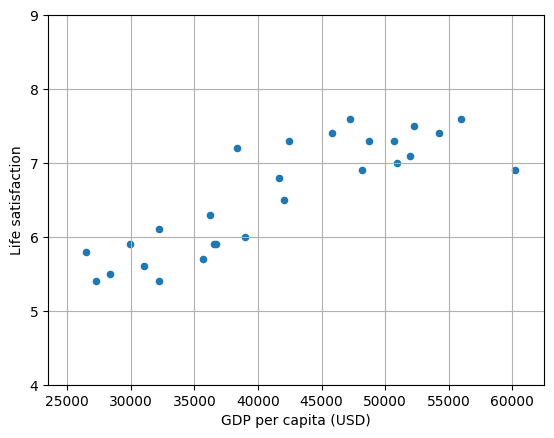

In [ ]:
data.plot(kind='scatter', grid=True, x = "GDP per capita (USD)", y = "Life satisfaction")
plt.axis([23_500, 62_500, 4, 9])
plt.show()

## 단계 2. 모델 선택

위에서 지정한 속성과 타겟을 활용하는 선형 회귀(linear regression) 모델을 선택한다.

In [ ]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

## 단계 3. 모델 훈련

In [ ]:
model.fit(X, Y)

LinearRegression()

완성된 식은 아래와 같다.

In [ ]:
w = model.coef_[0, 0]
b = model.intercept_[0]

print(f"y = {w} * X + {b}")

y = 6.778899694341222e-05 * X + 3.7490494273769093


## 단계 4.

모델 훈련이 끝났기 때문에, 새로운 데이터에 대해서 예측값을 구해본다.(**예측**(prediction) 또는 **추론**(inference))

In [ ]:
X_Cyprus = [[37655]]
Y_Cyprus = model.predict(X_Cyprus)

In [ ]:
print(f"키프로스의 삶의 만족도 : {Y_Cyprus[0, 0]:.5f}")

키프로스의 삶의 만족도 : 6.30164


참고) 위의 결과를 모두 그래프로 나타내면 다음 식을 이용할 수 있다.

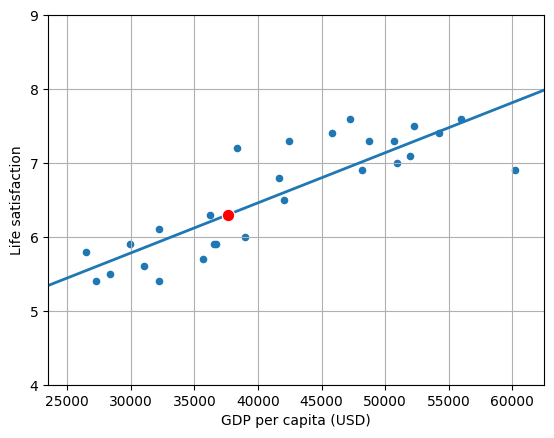

In [ ]:
import numpy as np
ax = data.plot(kind='scatter', grid=True, x = "GDP per capita (USD)", y = "Life satisfaction")

y_min, y_max = 4, 9
x_min, x_max = 23_500, 62_500
xs = np.linspace(x_min, x_max, 200).reshape(-1, 1)
ys = model.predict(xs)
ax.plot(xs, ys, linewidth=2)

x_cyprus = 37_655
y_cyprus = float(model.predict([[x_cyprus]]).item())
ax.scatter([x_cyprus], [y_cyprus], c='red', s=80, edgecolors='white', linewidths=0.8, zorder=5)

plt.axis([x_min, x_max, y_min, y_max])
plt.show()

또는 적절한 주석(annotation)을 표시할 수 있다.

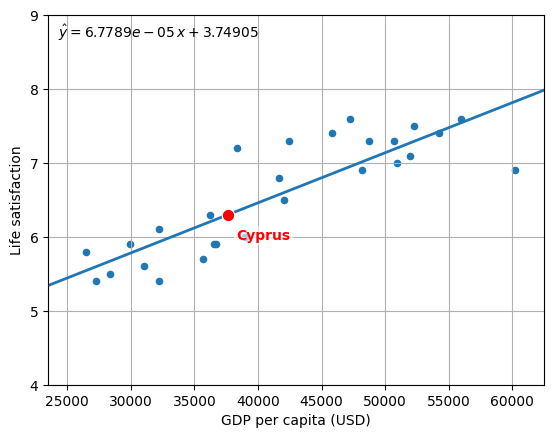

In [ ]:
ax = data.plot(kind='scatter', grid=True, x = "GDP per capita (USD)", y = "Life satisfaction")

y_min, y_max = 4, 9
x_min, x_max = 23_500, 62_500
xs = np.linspace(x_min, x_max, 200).reshape(-1, 1)
ys = model.predict(xs)
ax.plot(xs, ys, linewidth=2)

w = float(model.coef_[0, 0])
b = float(model.intercept_[0])
eq = rf"$\hat y = {w:.6g}\,x + {b:.6g}$"
ax.text(0.02, 0.98, eq, transform=ax.transAxes, va='top')

x_cyprus = 37_655
y_cyprus = float(model.predict([[x_c]]).item())
ax.scatter([x_cyprus], [y_cyprus], c='red', s=80, edgecolors='white', linewidths=0.8, zorder=5)
ax.annotate(
    "Cyprus", xy=(x_cyprus, y_cyprus),
    xytext=(6, -10), textcoords="offset points",
    ha='left', va='top', color='red', fontsize=10, fontweight='bold',
    bbox=dict(boxstyle='round,pad=0.2', fc='white', alpha=0.6, ec='none')
)

plt.axis([x_min, x_max, y_min, y_max])
plt.show()

## 숙제

다음의 데이터 경로에 대해서 <code>sklearn.neighbors.KNeighborsRegressor(n_neighbors=3)</code> 모델을 사용하여 예측을 해본다.

In [ ]:
new_data_path = "https://raw.githubusercontent.com/ageron/data/refs/heads/main/lifesat/lifesat_full.csv"

In [ ]:
new_data = pd.read_csv(new_data_path)
X = new_data[["GDP per capita (USD)"]].values
Y = new_data[["Life satisfaction"]].values

from sklearn.neighbors import KNeighborsRegressor
new_model = KNeighborsRegressor(n_neighbors=3)
new_model.fit(X, Y)

X_Cyprus = [[37655]]
Y_Cyprus = new_model.predict(X_Cyprus)
print(f"새로운 모델에 의한 키프로스의 삶의 만족도 : {Y_Cyprus[0, 0]:.5f}")

새로운 모델에 의한 키프로스의 삶의 만족도 : 6.33333


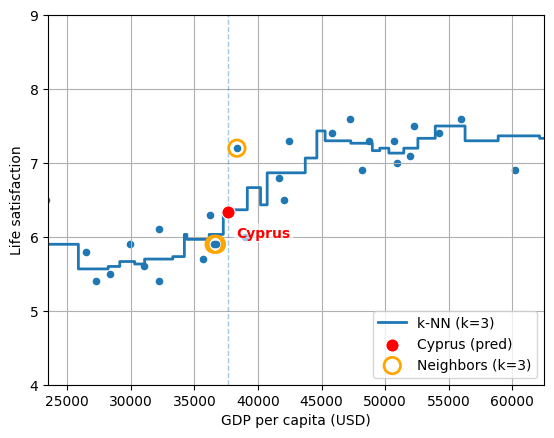

In [ ]:
ax = new_data.plot(kind='scatter', grid=True, x="GDP per capita (USD)", y="Life satisfaction")

y_min, y_max = 4, 9
x_min, x_max = 23_500, 62_500
xs = np.linspace(x_min, x_max, 600).reshape(-1, 1)
ys = new_model.predict(xs).ravel()
ax.plot(xs, ys, linewidth=2, drawstyle='steps-mid', label='k-NN (k=3)')

x_cyprus = 37_655
y_cyprus = new_model.predict([[x_c]]).item()
ax.scatter([x_cyprus], [y_cyprus], c='red', s=90, edgecolors='white', linewidths=0.8, zorder=5, label='Cyprus (pred)')
ax.annotate("Cyprus", xy=(x_cyprus, y_cyprus),
            xytext=(6, -10), textcoords="offset points",
            ha='left', va='top', color='red', fontsize=10, fontweight='bold',
            bbox=dict(boxstyle='round,pad=0.2', fc='white', alpha=0.6, ec='none'))

dist, idx = new_model.kneighbors([[x_cyprus]], n_neighbors=3, return_distance=True)
neighbors = new_data.iloc[idx[0]]
ax.scatter(neighbors["GDP per capita (USD)"], neighbors["Life satisfaction"],
           facecolors='none', edgecolors='orange', s=140, linewidths=2, zorder=6, label='Neighbors (k=3)')

ax.axvline(x=x_c, linestyle='--', linewidth=1, alpha=0.4)

plt.axis([x_min, x_max, y_min, y_max])
ax.legend(loc='lower right')
plt.show()